# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

> Hi, Team 👋

> The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD `signal line` is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` 看涨crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish`看跌 crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 1 is presented in the cell below: </font>

##### METHOD 1(ONLY FOR AAPL, ONE STOCK)

In [3]:
# AAPL = yf.download("AAPL", start = "2015-01-01", end = "2017-12-31")
# AAPL

# # calculate EMA for 12 days and 26 days (exponentially moving average)
# AAPL["EMA_12"] =\
# (
#     AAPL["Adj Close"]#  use apple close
#     .ewm(span = 12,
#          adjust = False)# at least 12 days
#     .mean()
# )

# AAPL["EMA_26"] =\
# (
#     AAPL["Adj Close"]
#     .ewm(span = 26,
#          adjust = False)
#     .mean()
# )

In [4]:
#AAPL["EMA_12"]

In [5]:
# AAPL["EMA_26"]

In [6]:
# # calculate the MACD(moving average convergence divergence)
# AAPL["MACD"] =\
# (
#     AAPL["EMA_12"] - AAPL["EMA_26"]# 12day of EMA minus 26 days
# )

# # use <halflife> to calculate signal line of the MACD(9 days)
# # General setting of MACD are 12（short-term）,26（long-term）,9（signal line）
# AAPL["SIGNAL_LINE"] =\
# (
#     AAPL["MACD"]
#     .ewm(span = 9,
#          adjust = False)
#     .mean()
# )# then we can get the signal line of the MACD


# #AAPL["BUY_SELL_SIGNAL"] = 0

# AAPL["BUY_SELL_SIGNAL"] =\
# (
#     np
#     .where(AAPL["MACD"] > AAPL["SIGNAL_LINE"],
#            1, 0)
# )

# AAPL["buy_sell"] = AAPL["BUY_SELL_SIGNAL"].diff()

In [7]:
# print(AAPL["buy_sell"].value_counts()) 

In [8]:
# print(AAPL["BUY_SELL_SIGNAL"].value_counts())

In [9]:
# print(AAPL[["MACD", "SIGNAL_LINE"]].tail(10))

In [10]:
# # create the graph and subgraph
# fig =\
# (
#     plt
#     .figure(figsize = [16, 8]
#            )
# )

# sub =\
# (
#     fig
#     .add_subplot(111,
#                  ylabel = "Stock Price")# add subgraph, and set the longitudinal label called "Stock price"
# )


## plot the Adj close of the AAPL stock
## (
##     AAPL
##     ["Adj Close"]
##     .plot(ax = sub,
##           color = "grey",
##           linewidth = 0.75)
##)
##plot the MACD line and signal line
# (
#     AAPL
#     [["MACD", "SIGNAL_LINE"]]
#     .plot(ax = sub,
#           style = ["--", "--"],
#           linewidth = 0.80)
# )

# # BUY signal

# (
#     sub
#     .plot(AAPL.loc[AAPL["buy_sell"] == 1.0].index,
#           AAPL.MACD[AAPL["buy_sell"] == 1.0],
#           "^",
#           color = "green",
#           markersize = 12)
# )

# # SELL signal

# (
#     sub
#     .plot(AAPL.loc[AAPL["buy_sell"] == -1.0].index,
#           AAPL.MACD[AAPL["buy_sell"] == -1.0],
#           "v",
#           color = "red",
#           markersize = 12)
# )

# plt.show()

#### We can define a function that can plot STOCK PRICE for companies because from Q6 TO Q10 we need to plot 6 stocks at one time.

In [36]:
def macd_strategy(ticker, s = "2015-01-01", e = "2017-12-31"):

    stock_data = yf.download(ticker, start = s, end = e)

    stock_data["EMA_12"] = stock_data["Adj Close"].ewm(span = 12, adjust = False).mean()
    stock_data["EMA_26"] = stock_data["Adj Close"].ewm(span = 26, adjust = False).mean()

    stock_data["MACD"] = stock_data["EMA_12"] - stock_data["EMA_26"]
    stock_data["SIGNAL_LINE"] = stock_data["MACD"].ewm(span = 9, adjust = False).mean()

    stock_data["bs_signal"] = np.where(stock_data["MACD"] > stock_data["SIGNAL_LINE"], 1, 0)
    stock_data["buy_sell"] = stock_data["bs_signal"].diff()

    return stock_data

def plot_macd(stock_data):
    fig, ax = plt.subplots(figsize = [16, 8])
    # sub = fig.add_subplot(111, ylabel = "Stock Price")

    stock_data[["MACD", "SIGNAL_LINE"]].plot(ax = ax, style = ["--", "--"], linewidth = 1.0)

    ax.plot(stock_data.loc[stock_data["buy_sell"] == 1.0].index,
            stock_data["MACD"][stock_data["buy_sell"] == 1.0],
            "^", color = "green", markersize = 10, label = "Buy Signal")

    ax.plot(stock_data.loc[stock_data["buy_sell"] == -1.0]. index,
            stock_data["MACD"][stock_data["buy_sell"] == -1.0],
            "v", color = "red", markersize = 10, label = "Sell Signal")

    ax.legend()
    plt.show()

[*********************100%%**********************]  1 of 1 completed


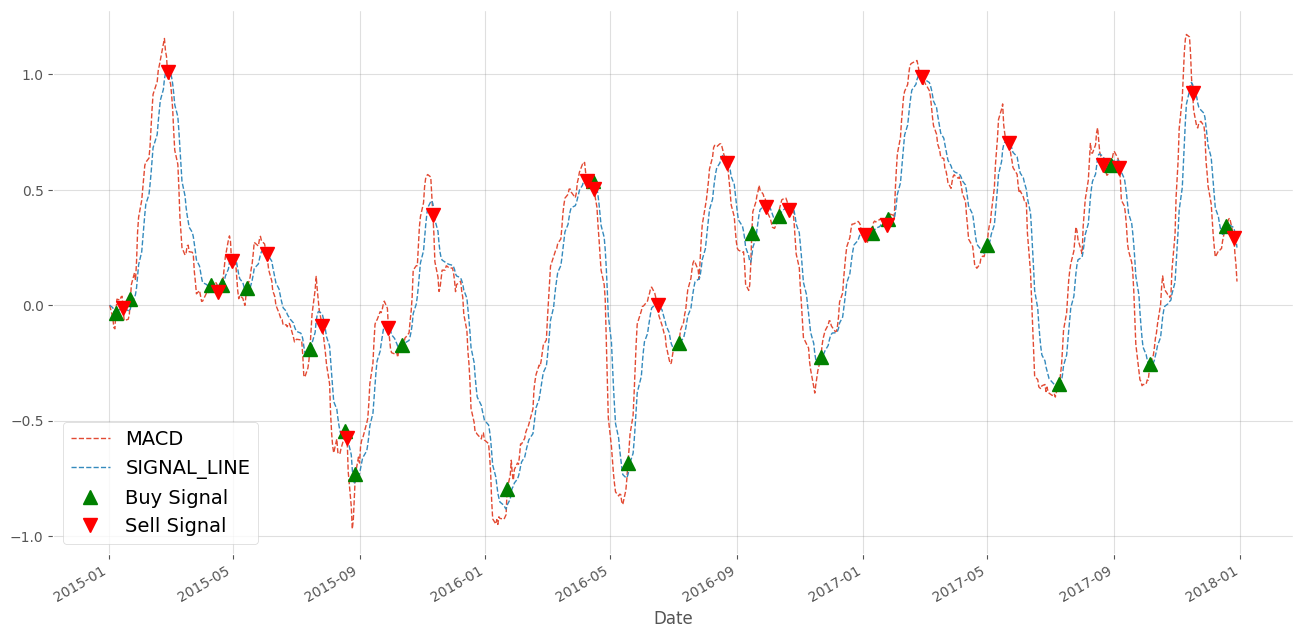

In [37]:
AAPL = macd_strategy("AAPL")
plot_macd(AAPL)

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.定义一个函数来计算基于 MACD 交叉策略的累计收益，并考虑初始资本和每笔交易的佣金

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy? 累计收益的计算：在每次交易时，根据当前股票价格、持仓数量和资本来计算最终的总收益。

### Below are the lines of code that lead to an answer:

In [38]:
def MACD_return(stock_data, int_cap = 100000, commission = 5):
    cap_base = int_cap#   初始资本
    nums_shares_owned = 0#   当前持有的所有股票数量

    for i in range(len(stock_data)):#循环所有的买卖信号
        share_price = stock_data["Adj Close"].iloc[i]# 获得当前的股票价格

        if stock_data["buy_sell"].iloc[i] == 1:#  买入（买入信号）
            nums_sharesto_buy = cap_base // share_price# 计算可以买入多少股
            total_cost = nums_sharesto_buy * share_price + commission# total cost
            cap_base -= total_cost# 扣除买入成本
            nums_shares_owned += nums_sharesto_buy# 更新持有的股票数量

        elif stock_data["buy_sell"].iloc[i] == -1:
            if nums_shares_owned > 0:
                total_sell_price = nums_shares_owned * share_price - commission
                cap_base += total_sell_price
                #cumu_returns += total_sell_price - int_cap
                nums_shares_owned = 0# 清空持仓
    
    cumu_returns_perc = (cap_base - int_cap) / int_cap * 100
    return cumu_returns_perc, cap_base
            

In [39]:
cumu_returns_perc, final_cap = MACD_return(AAPL)

In [40]:
print(f" percentage of cumulative returns: {cumu_returns_perc}%")
print(f"final captial: {final_cap}")

 percentage of cumulative returns: 75.7164313735962%
final captial: 175716.4313735962


### <font color = red> Answer 2 </font>

    The answer is _____75.7164_______ % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [57]:
def worst_DD(stock_data, top = 5):
    stock_data["rol_max"] = stock_data["Adj Close"].cummax()
    stock_data["dd"] = (stock_data["Adj Close"] - stock_data["rol_max"]) / stock_data["rol_max"] * 100

    dd_period = []
    in_dd = False
    start = 0

    for i in range(1, len(stock_data)):
        if stock_data["dd"].iloc[i] < 0 and not in_dd:
            start = i
            in_dd = True
        elif stock_data["dd"].iloc[i] == 0 and in_dd:
            end = i - 1
            dd_perc = stock_data["dd"].iloc[start:end+1].min()
            time = end - start + 1#   持续时间
            dd_period.append((dd_perc, time))
            in_dd = False

    if in_dd:
        end = len(stock_data) - 1
        dd_perc = stock_data["dd"].iloc[start:end + 1].min()
        time = end - start + 1
        dd_period.append((dd_perc, time))

    worst_DD = sorted(dd_period, key = lambda x: x[0])[:top]
    return worst_DD

In [58]:
AAPL = macd_strategy("AAPL")
worst_drawdowns = worst_DD(AAPL, top = 5)
for dd_perc, time in worst_drawdowns:
    print(dd_perc, time)

[*********************100%%**********************]  1 of 1 completed

-30.44380927867066 426
-8.859661228168118 55
-8.22918977752045 39
-8.090219888793348 62
-5.374511265199195 7


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown ___-30.44_________ % | Duration ______426______ Days
    
    The 2nd worst drawdown period : Net drawdown _____-8.86_______ % | Duration ____55________ Days
     
    The 3rd worst drawdown period : Net drawdown ______-8.23______ % | Duration _________39___ Days
         
    The 4th worst drawdown period : Net drawdown _____-8.09_______ % | Duration ____62________ Days
    
    The 5th worst drawdown period : Net drawdown _____-5.37_______ % | Duration _______7_____ Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [43]:
def annual_returns(AAPL):
    AAPL["year"] = AAPL.index.year# 添加一个表示年份的列

    #按年份分组并计算每年的年度回报率
    start_price = AAPL.groupby("year")["Adj Close"].first()
    end_price = AAPL.groupby("year")["Adj Close"].last()

    #年度回报率和平均年度回报率
    annual_return_rate = (end_price - start_price) / start_price * 100
    avg_annual_return_rate = annual_return_rate.mean()

    #找出高于和低于平均值的年份
    higher = annual_return_rate[annual_return_rate > avg_annual_return_rate]
    lower = annual_return_rate[annual_return_rate < avg_annual_return_rate]

    return annual_return_rate, higher, lower
    

In [44]:
annual_return_rate, higher, lower = annual_returns(AAPL)
print("Annual returns: \n", annual_return_rate)
print("\nYears below average: \n", higher)
print("\nYears above average: \n", lower)

Annual returns: 
 year
2015    -2.082272
2016    12.384342
2017    48.042533
Name: Adj Close, dtype: float64

Years below average: 
 year
2017    48.042533
Name: Adj Close, dtype: float64

Years above average: 
 year
2015    -2.082272
2016    12.384342
Name: Adj Close, dtype: float64


### <font color = red> Answer 4 </font>

    Below average year(s) : _____2017_______ 
    
    Above average year(s) : ______2015,2016______ 
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [45]:
def annual_sharpe_ratio(AAPL, risk_free_rate = 0.01):
    #将每天的risk free rate转化为一整年的无风险利率的 1/252，假设年化无风险收益率为0.01
    daily_rf_rate = risk_free_rate / 252

    #每日回报率的百分比
    AAPL["daily_return"] = AAPL["Adj Close"].pct_change()

    #计算超额回报率 = 投资组合每日回报率 - 每日无风险回报率
    AAPL["excess_return"] = AAPL["daily_return"] - daily_rf_rate

    #计算每日的超额回报率的均值
    mean_excess_return = AAPL["excess_return"].mean()

    #计算每日回报率的sd
    sd_return = AAPL["daily_return"].std()

    #计算 daily sharpe ratio, and annualized it
    daily_sharpe_ratio = mean_excess_return / sd_return# daily sharpe ratio
    annual_sharpe_ratio = daily_sharpe_ratio * np.sqrt(252)

    return annual_sharpe_ratio

In [46]:
sharpe_ratio = annual_sharpe_ratio(AAPL)
print(sharpe_ratio)

0.7890594819902882


### <font color = red> Answer 5 </font>
    
    Sharpe ratio: ____0.789______
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 is presented in the cell below: </font>

In [47]:
tickers = ["MSFT", "AMZN", "UAL", "DAL", "XOM", "CVX"]

for item in tickers:
    macd_strategy(item)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


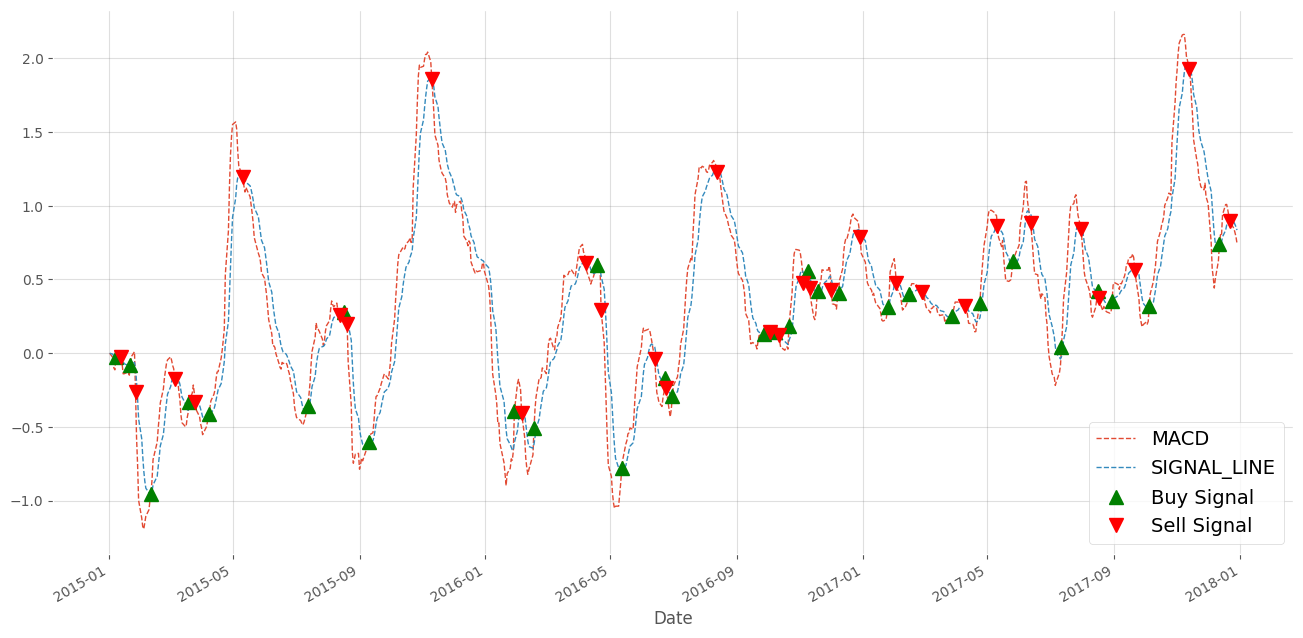

In [48]:
MSFT =  macd_strategy("MSFT")
plot_macd(MSFT)

[*********************100%%**********************]  1 of 1 completed


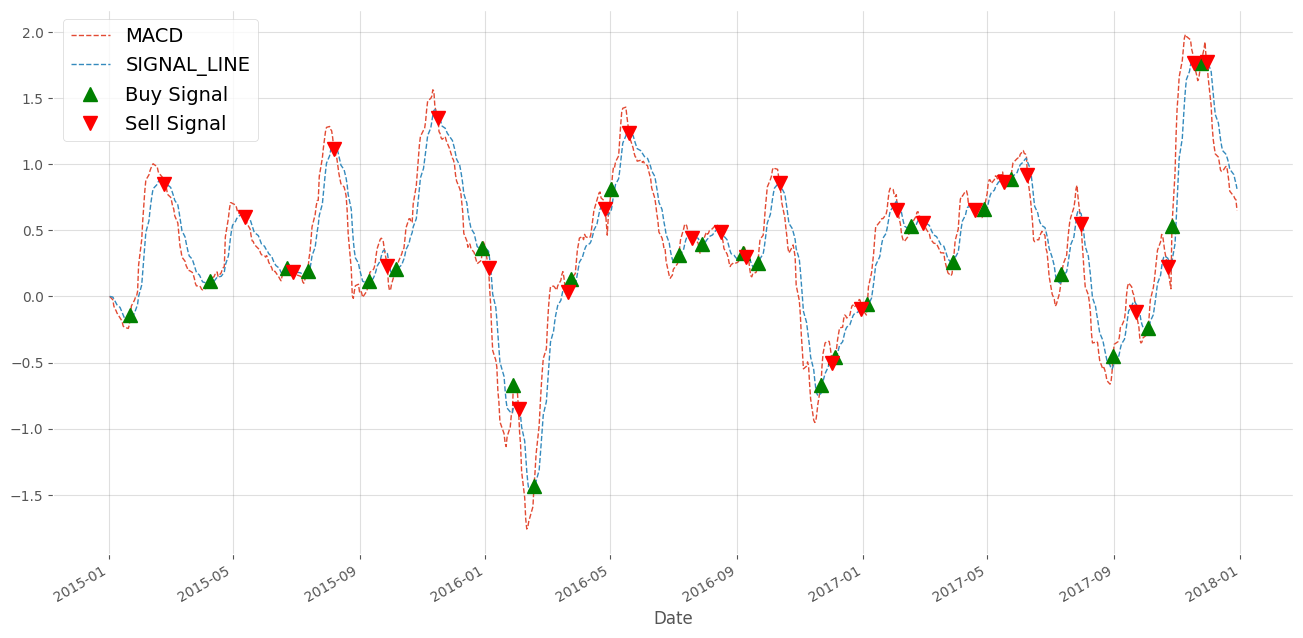

In [49]:
AMZN =  macd_strategy("AMZN")
plot_macd(AMZN)

[*********************100%%**********************]  1 of 1 completed


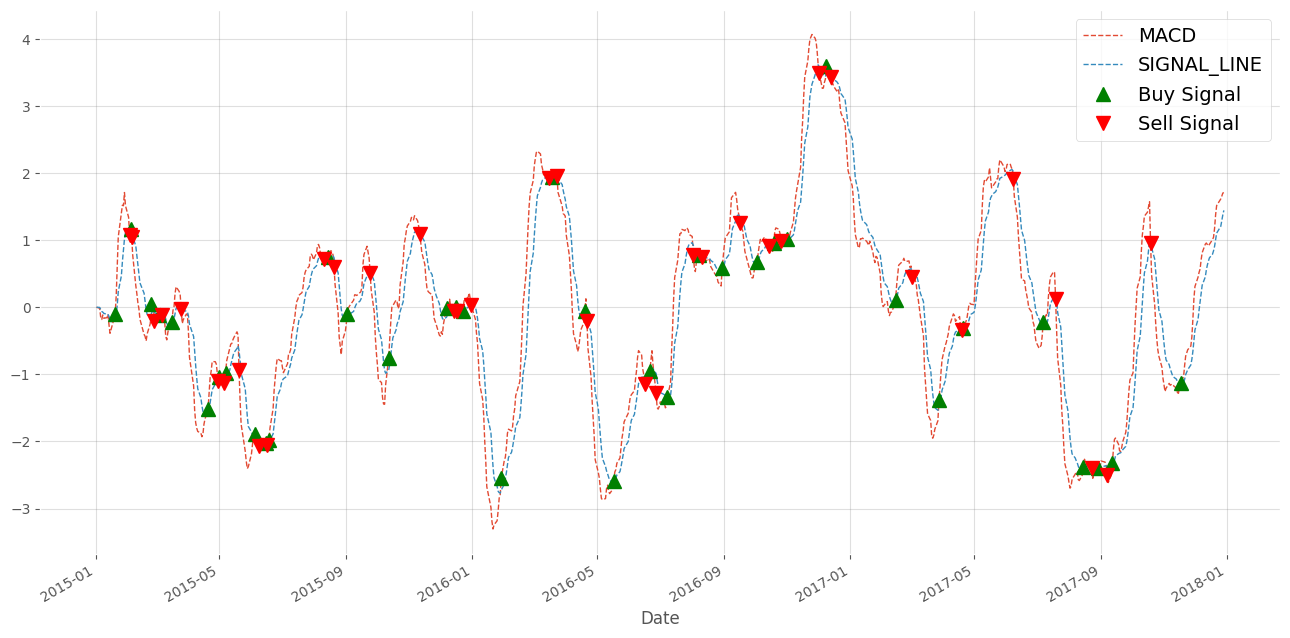

In [50]:
UAL =  macd_strategy("UAL")
plot_macd(UAL)

[*********************100%%**********************]  1 of 1 completed


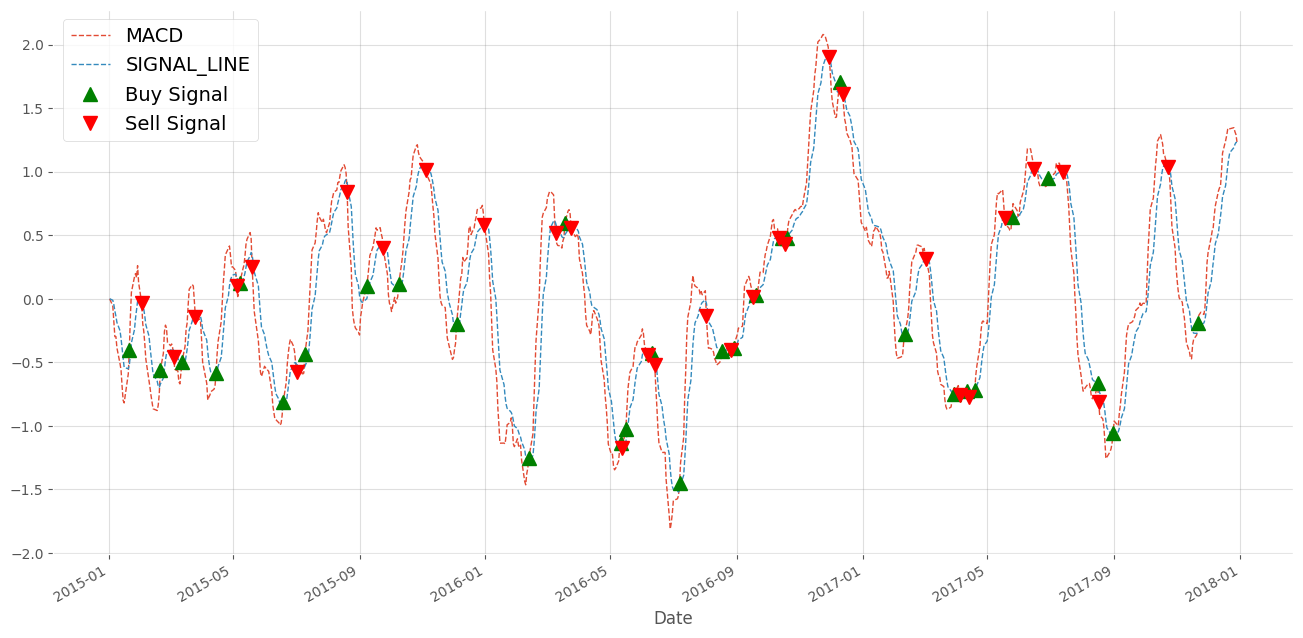

In [51]:
DAL =  macd_strategy("DAL")
plot_macd(DAL)

[*********************100%%**********************]  1 of 1 completed


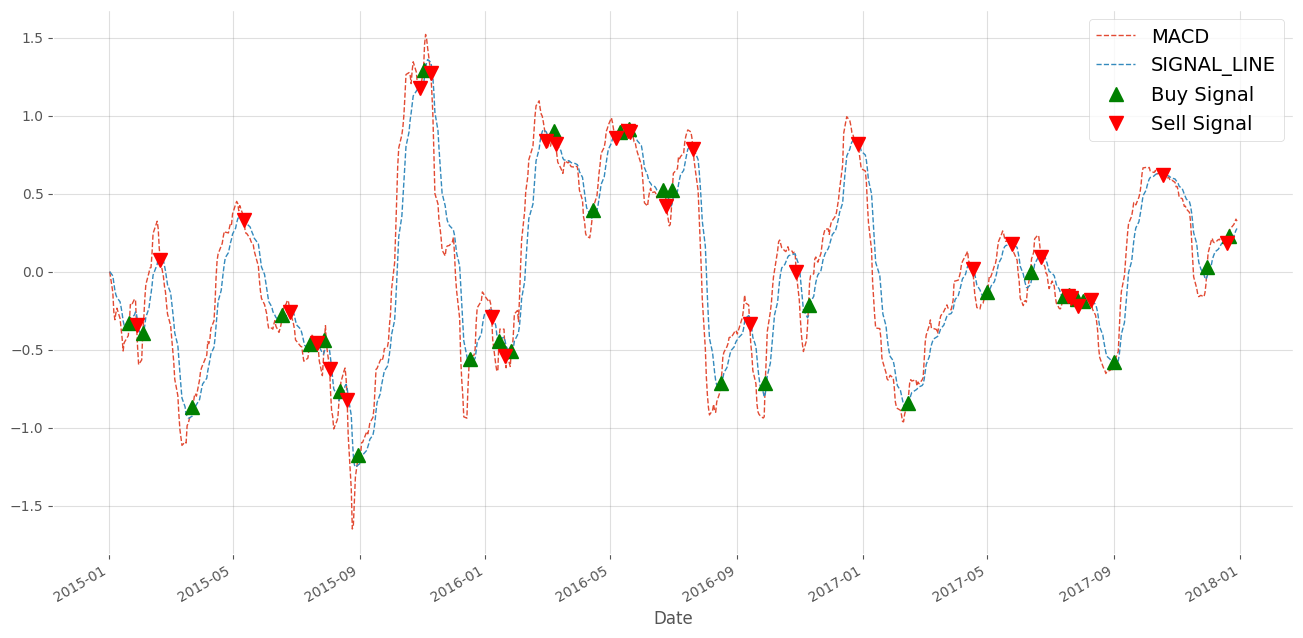

In [52]:
XOM =  macd_strategy("XOM")
plot_macd(XOM)

[*********************100%%**********************]  1 of 1 completed


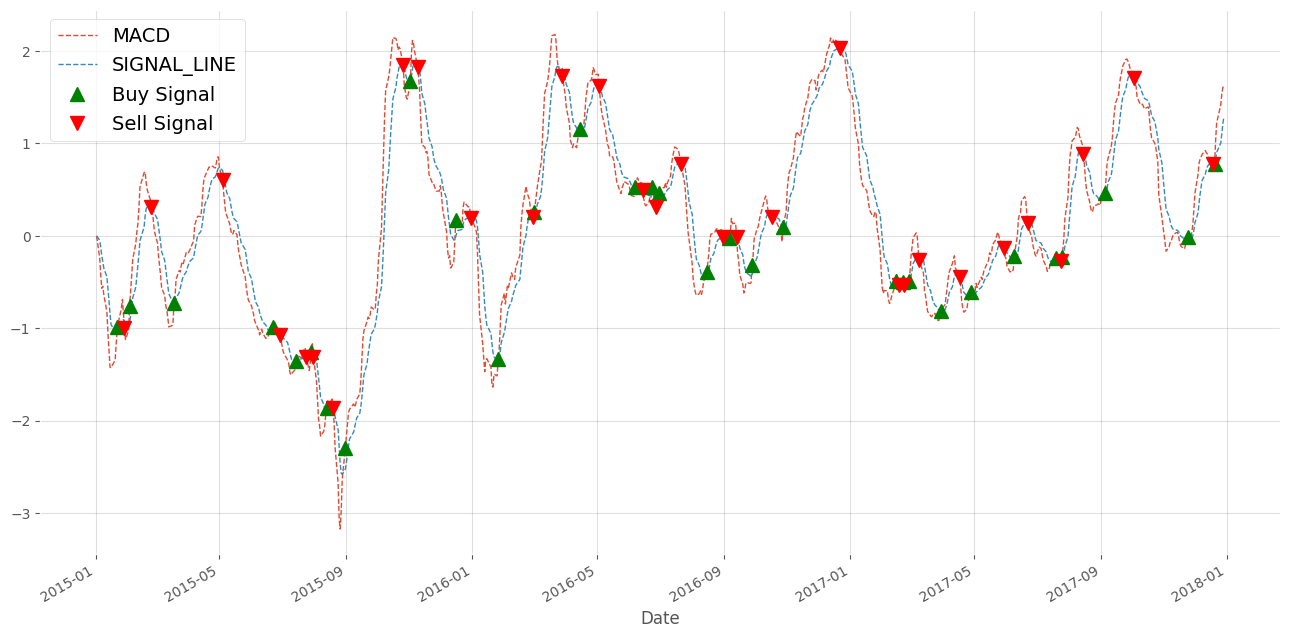

In [53]:
CVX =  macd_strategy("CVX")
plot_macd(CVX)

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [54]:
cumu_returns = {}
for items in tickers:
    stock_data = macd_strategy(items)
    cumu_returns_perc, final_cap = MACD_return(stock_data)
    cumu_returns[items] = cumu_returns_perc

best_stock = max(cumu_returns, key=cumu_returns.get)
best_return = cumu_returns[best_stock]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [55]:
best_stock

'AMZN'

### <font color = red> Answer 7 </font>

    The answer is ________________'AMZN'__________________________ .

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [80]:
worst_drawdowns_dict = {}
# 初始化最大回撤的股票和回撤值
max_drawdown_stock = None
max_drawdown_value = float('inf')  # 初始为正无穷大
max_drawdown_duration = None #记录最大回撤的持续时间是多少

for items in tickers:
    stock_data = macd_strategy(items) # 获取股票数据
    wd = worst_DD(stock_data, top=5)  # 计算最大回撤（带入之前定义的方程）
    worst_drawdowns_dict[items] = wd  # 存储结果
    
    current_max_dd = min(wd, key=lambda x: x[0])  # 找到回撤百分比最小的值 == 最大回撤

    if current_max_dd[0] < max_drawdown_value:# 比较当前回撤值与保存的最大回撤值比较
            max_drawdown_value = current_max_dd[0]# 并且一直更新最大回撤值的股票信息
            max_drawdown_stock = items
            max_drawdown_duration = current_max_dd[1]

print(max_drawdown_stock)
print(max_drawdown_value)
print(max_drawdown_duration)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

UAL
-48.723174963814266
473


### <font color = red> Answer 8 </font>

    The answer is __________________UAL________________________ .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [83]:
for i in



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

None


### <font color = red> Answer 9 </font>

    The answer is __________________________________________ .

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 10 </font>

    MSFT ____________
    
    AMZN ____________

    UAL  ____________

    DAL  ____________

    XOM  ____________
    
    CVX  ____________

### <font color="green">"💯 Thank you for putting your efforts into the exercise problem sets 😊"</font>